# Непрерывные случайные величины в Python

Импортируем библиотеку для работы со случайными величинами

In [21]:
import numpy as np
import scipy
from scipy import stats

А также для рисования графиков

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [23]:
stats.rv_continuous

scipy.stats._distn_infrastructure.rv_continuous

Начнем с равномерного распределения $U[a, b]$

In [24]:
a, b = 0, 1
rv_uniform = stats.uniform(loc=a, scale=b-a)

Изобразим график функции распределения

Text(0, 0.5, 'F(x)')

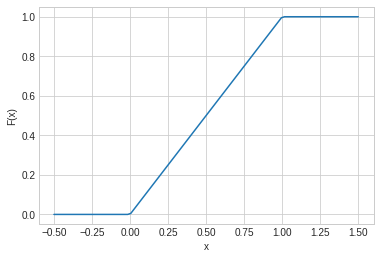

In [25]:
X = np.linspace(-0.5, 1.5, 100)
plt.plot(X, rv_uniform.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')

А также график плотности

Text(0, 0.5, 'f(x)')

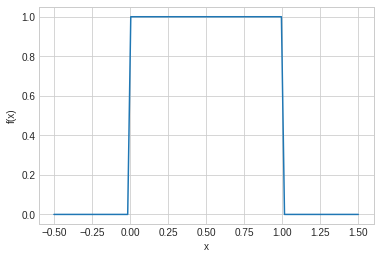

In [26]:
X = np.linspace(-0.5, 1.5, 100)
plt.plot(X, rv_uniform.pdf(X))
plt.xlabel('x')
plt.ylabel('f(x)')

Проделаем то же самое для нормального распределения $N(\mu, \sigma^2)$

In [27]:
mu = 0
sigma = 1

rv_norm = stats.norm(loc=mu, scale=sigma)

Text(0, 0.5, 'F(x)')

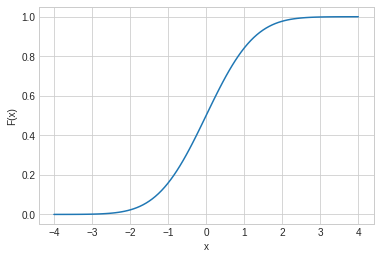

In [28]:
X = np.linspace(-4, 4, 100)
plt.plot(X, rv_norm.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')

In [9]:
rv_norm.ppf(0.98) # квантиль нормального распределения

2.0537489106318225

Text(0, 0.5, 'f(x)')

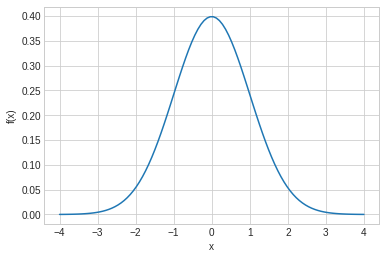

In [29]:
X = np.linspace(-4, 4, 100)
plt.plot(X, rv_norm.pdf(X))
plt.xlabel('x')
plt.ylabel('f(x)')

Расмотрим другие распределения, например, распределение стандартное распределение Коши $C(0, 1)$ и распределение Парето $P(2,1)$.

In [30]:
rv_cauchy = stats.cauchy
rv_pareto = stats.pareto(2)

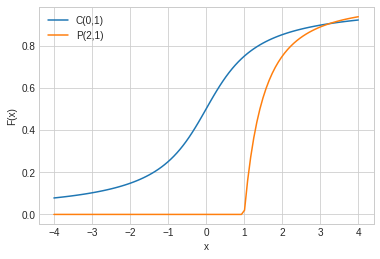

In [31]:
X = np.linspace(-4, 4, 100)
plt.plot(X, rv_cauchy.cdf(X), label='C(0,1)')
plt.plot(X, rv_pareto.cdf(X),label='P(2,1)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()

Проиллюстрируем правило 3 сигм и тяжелых хвостов распределения Коши – найдем, во сколько раз значение стандартного нормального распределения в точке $-3$ меньше значения стандартного распределения Коши в той же точке.

In [13]:
rv_cauchy.cdf(-3) / rv_norm.cdf(-3)

75.8697175266579

Для наглядности изобразим графики функции плотности стандартных распределений Коши и нормального на одном рисунке

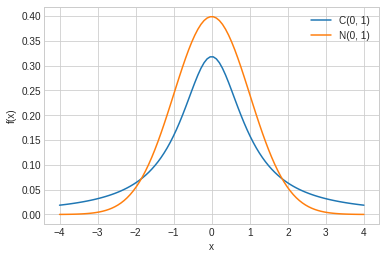

In [14]:
X = np.linspace(-4, 4, 100)
plt.plot(X, rv_cauchy.pdf(X), label='C(0, 1)')
plt.plot(X, rv_norm.pdf(X), label='N(0, 1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

$\textbf{Выборкой}$ называется набор значений случаных величин $X_1,X_2,\ldots,X_n$, имеющих одинаковое распределение.

Можно сгенерировать выборку с заданным распределением

In [15]:
rv_uniform.rvs(10)

array([0.79844001, 0.57046769, 0.66662284, 0.94794994, 0.72332837,
       0.56493204, 0.48234496, 0.70693684, 0.49962716, 0.53277248])

(array([0.80414317, 0.99512718, 1.02528255, 1.05543792, 1.09564507,
        1.00517897, 0.88455749, 1.17605939, 0.79409138, 1.21626655]),
 array([9.64561202e-05, 9.95812277e-02, 1.99065999e-01, 2.98550771e-01,
        3.98035543e-01, 4.97520314e-01, 5.97005086e-01, 6.96489857e-01,
        7.95974629e-01, 8.95459401e-01, 9.94944172e-01]),
 <a list of 10 Patch objects>)

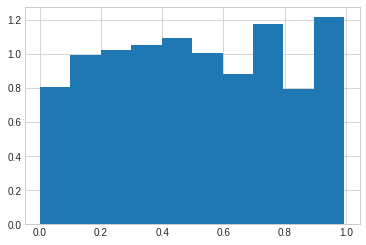

In [16]:
plt.hist(rv_uniform.rvs(1000), density =True)

Решим еще одну задачу, связанную с показательным распределением.

В некоторой компании оказалось, что продолжительность коммуникации в корпоративной системе (в минутах) хорошо приближается показательным распределением с параметром $\lambda=0.1$.
Чему равняется вероятность того, что разговор коллег продлится не дольше пяти минут?

In [17]:
lambd = 0.1
rv_exp = stats.expon(loc=0, scale = 1 / lambd)

In [18]:
rv_exp.mean()

10.0

Text(0, 0.5, 'F(x)')

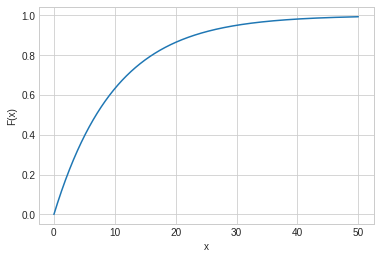

In [19]:
X = np.linspace(0, 50, 1000)
plt.plot(X, rv_exp.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')

Для решения задачи достаточно найти значение функции распределения в точке $5$

In [20]:
rv_exp.cdf(5)

0.3934693402873666

Вероятность составляет около 39%